In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Algebra 3

### Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = y$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back a new vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close as possible" to the original vector

Note: computing P is generally very expensive.

### Fruit Sales Example

In [2]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    [10, 4, 1],
    [10, 4, 1]
])
y = np.array([7, 5, 5, 8, 8.5]).reshape(-1, 1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [3]:
c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

Multiply both sides by `X.T` ---> this will usually make it solvable.

In [4]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.54861111],
       [0.29861111],
       [1.55555556]])

What is special about multiplication of a matrix with its transpose? Resultant shape is always a square.

In [5]:
X.T.shape

(3, 5)

In [6]:
X.shape

(5, 3)

In [7]:
(X.T @ X).shape

(3, 3)

Let's compute $P = X(X^TX)^{-1}X^T$.

- **IMPORTANT**: We are not going to discuss how inverse works. That is beyond the scope of CS320.

### `np.linalg.inv(a)`

- computes the (multiplicative) inverse of a matrix.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [8]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [9]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [10]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

The new vector will be as "close as possible" to the original vector.

In [11]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

#### Scatter plot visualization

**IMPORTANT**: We are not going to discuss how `np.random.normal` works. You can look up the documentation if you are interested.

In [12]:
x = np.random.normal(5, 2, size=(10, 1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x": x.reshape(-1), "y": y.reshape(-1)})
df

x          y
0  5.182840  11.129319
1  5.629005  12.999938
2  2.236548   6.425195
3  6.953317  14.110459
4  7.111768  13.965831
5  2.570483   6.072308
6  1.118458   1.096003
7  7.007996  13.330953
8  6.295092  14.335352
9  6.066533  11.733579

<AxesSubplot:xlabel='x', ylabel='y'>

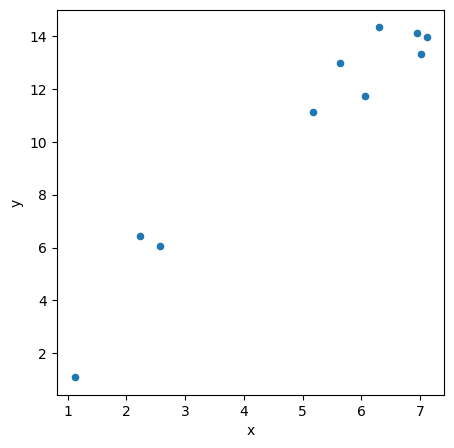

In [13]:
df.plot.scatter(x="x", y="y", figsize=(5, 5))

In [14]:
X = df[["x"]].values
X

array([[5.18283978],
       [5.62900503],
       [2.23654838],
       [6.95331672],
       [7.11176793],
       [2.57048344],
       [1.11845795],
       [7.00799598],
       [6.29509189],
       [6.06653262]])

In [15]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.09078718, 0.09860261, 0.03917735, 0.12180042, 0.12457599,
        0.04502685, 0.01959189, 0.12275823, 0.11027037, 0.10626673],
       [0.09860261, 0.10709082, 0.04254994, 0.13228562, 0.13530012,
        0.04890299, 0.02127846, 0.13332588, 0.11976301, 0.11541471],
       [0.03917735, 0.04254994, 0.01690618, 0.05256048, 0.05375822,
        0.01943042, 0.00845448, 0.0529738 , 0.04758492, 0.04585723],
       [0.12180042, 0.13228562, 0.05256048, 0.16340788, 0.1671316 ,
        0.06040819, 0.02628456, 0.16469288, 0.14793913, 0.14256783],
       [0.12457599, 0.13530012, 0.05375822, 0.1671316 , 0.17094017,
        0.06178476, 0.02688353, 0.16844588, 0.15131035, 0.14581664],
       [0.04502685, 0.04890299, 0.01943042, 0.06040819, 0.06178476,
        0.02233154, 0.0097168 , 0.06088322, 0.05468974, 0.05270409],
       [0.01959189, 0.02127846, 0.00845448, 0.02628456, 0.02688353,
        0.0097168 , 0.00422794, 0.02649125, 0.02379637, 0.02293238],
       [0.12275823, 0.13332588, 0.0529738

In [16]:
df["p"] = P @ df[["y"]]
df

x          y          p
0  5.182840  11.129319  10.761444
1  5.629005  12.999938  11.687844
2  2.236548   6.425195   4.643881
3  6.953317  14.110459  14.437592
4  7.111768  13.965831  14.766594
5  2.570483   6.072308   5.337250
6  1.118458   1.096003   2.322322
7  7.007996  13.330953  14.551126
8  6.295092  14.335352  13.070880
9  6.066533  11.733579  12.596309

In [17]:
ax = df.plot.scatter(x="x", y="y", figsize=(5, 5), color="k")
df.plot.scatter(x="x", y="p", color="r", ax=ax)

<AxesSubplot:xlabel='x', ylabel='p'>

### Euclidean Distance between columns

- how close is the new vector (`P @ y`) to the original vector (`y`)?
- $dist$ = $\sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

In [18]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

v1  v2
x   1   4
y   8  12

In [19]:
# distance between v1 and v2 is 5
((coords["v1"] - coords["v2"]) ** 2).sum() ** 0.5 

5.0

In [20]:
# this is the smallest possible distance between y and p, such
# that X @ c = p is solveable
((df["y"] - df["p"]) ** 2).sum() ** 0.5

3.4138575291447424

### Lab review

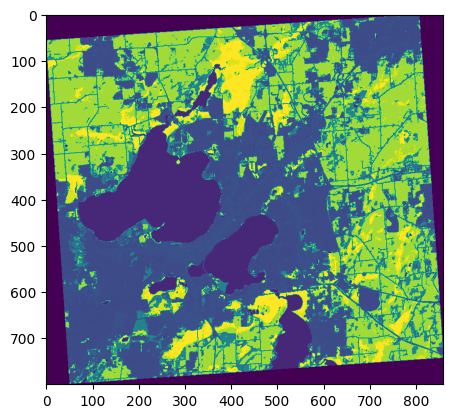

In [21]:
# As an exception, I am providing all the relevant import statements in this cell
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
import matplotlib.pyplot as plt

land = rasterio.open("zip://land.zip!wi.tif")
# a = land.read()
window = gpd.GeoSeries([box(-89.5, 43, -89.2, 43.2)]).set_crs("epsg:4326").to_crs(land.crs)
plt.imshow(mask(land, window, crop=True)[0][0])

# Classification 1

In [22]:
data = datasets.load_iris()
df = pd.DataFrame(data["data"], columns=data["feature_names"]).drop(columns=["petal length (cm)"])
df.insert(2, "const", 1)
df["variety"] = data["target_names"][data["target"]]
df.insert(4, "setosa", df["variety"] == "setosa")

In [23]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
train, test = train_test_split(df, test_size=10, random_state=5)
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  
82   versicolor  
134   virginica  
114   virginica  
42       setosa  
109   virginica  
57   versicolor  
1        setosa  
70   versicolor  
25       setosa  
84   versicolor

### Model 1: Predict petal width

- regression problem

In [24]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "petal width (cm)"

# 1. initialize model
reg_model = LinearRegression(fit_intercept=False)
# 2. fit using train data
reg_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["pet_width_predictions"] = reg_model.predict(test[xcols])
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  
82   versicolor               1.327769  
134   virginica               1.590835  
114   virginica               1.279061  
42       setosa               0.083889  
109   virginica               1.889735  
57   versicolor               0.830818  
1        setosa               0.538569  
70   versicolor               1.155681  
25       setosa               0.610022  
84   versicolor               0.895833

Review of `score` method that enables us compute R^2 score.

In [25]:
reg_model.score(test[xcols], test[ycol])

0.5805709195672956

##### Math behind model 1: how does it predict?

Recall that we can extract co-efficients using `<model obj>.coef_`.

In [26]:
reg_model.coef_

array([ 0.71452794, -0.48708032, -1.5013766 ])

In [27]:
# converting into a vertical array / vector and assigning values to c
c = reg_model.coef_.reshape(-1, 1)
c

array([[ 0.71452794],
       [-0.48708032],
       [-1.5013766 ]])

In [28]:
# assign X
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

Let's use Linear Algebra to do the prediction `y = X @ c`.

In [29]:
y = X @ c
y

array([[1.32776857],
       [1.59083498],
       [1.27906054],
       [0.0838893 ],
       [1.8897354 ],
       [0.83081752],
       [0.53856933],
       [1.15568121],
       [0.61002213],
       [0.8958333 ]])

In [30]:
# comparing with model predictions
test["pet_width_predictions"]

82     1.327769
134    1.590835
114    1.279061
42     0.083889
109    1.889735
57     0.830818
1      0.538569
70     1.155681
25     0.610022
84     0.895833
Name: pet_width_predictions, dtype: float64

## LogisticRegression

- classification model
- predict categorical labels

### Model 2 - part a: Predict whether flower is "setosa"

- classification problem, specifically binary classification: True / False

In [31]:
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "setosa"

# 1. initialize model
cls_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
cls_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["setosa_predictions"] = cls_model.predict(test[xcols])
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  setosa_predictions  
82   versicolor               1.327769               False  
134   virginica               1.590835               False  
114   virginica               1.279061               False  
42       setosa               0.083889                True  
109   virginica               1.889735               False  
57   versicolor               0.830818               False  
1        setosa               0.538569                True  
70   versicolor               1.155681               False  
25       setosa               0.610022                True  
84   versicolor               0.895833               False

What is the accuracy? That is what percent of the time is it correct?

In [32]:
cls_model.score(test[xcols], test[ycol])

1.0

##### Math behind model 2 - part a: how does it predict?

In [33]:
cls_model.coef_.reshape(-1, 1)

array([[-2.42108094],
       [ 3.90002306],
       [ 0.75064911]])

In [34]:
# converting into a vertical array / vector and assigning values to c
c = cls_model.coef_.T

In [35]:
# assign X
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

Let's use Linear Algebra to do the prediction `y = X @ c`.

In [36]:
X @ c

array([[-2.76155804],
       [-3.87788463],
       [-2.37155574],
       [ 2.5779668 ],
       [-2.6410506 ],
       [-1.75259212],
       [ 0.58742172],
       [-1.05365461],
       [ 0.34531362],
       [-0.62311875]])

Negative values => False and positive => True.

In [37]:
X @ c > 0

array([[False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [38]:
# comparing with model predictions
test["setosa_predictions"]

82     False
134    False
114    False
42      True
109    False
57     False
1       True
70     False
25      True
84     False
Name: setosa_predictions, dtype: bool

### Model 2 - part b: Predict probablity of flower being "setosa"

- classification problem, probablity between 0 to 1

#### `<model object>.predict_proba(X)`

- Calibrated probabilities of classification.
- returns a numpy array of probabilities (that it is True):
    - [[False probablity, True probablity], ...]
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html#sklearn.calibration.CalibratedClassifierCV.predict_proba

In [39]:
cls_model.predict_proba(test[xcols])  

array([[0.9405628 , 0.0594372 ],
       [0.97972503, 0.02027497],
       [0.91463241, 0.08536759],
       [0.07056997, 0.92943003],
       [0.93345725, 0.06654275],
       [0.85227945, 0.14772055],
       [0.35722665, 0.64277335],
       [0.74147607, 0.25852393],
       [0.41451931, 0.58548069],
       [0.65092753, 0.34907247]])

Extract just the True probablities.

In [40]:
cls_model.predict_proba(test[xcols])[:, 1]

array([0.0594372 , 0.02027497, 0.08536759, 0.92943003, 0.06654275,
       0.14772055, 0.64277335, 0.25852393, 0.58548069, 0.34907247])

In [41]:
test["setosa_prob"] = cls_model.predict_proba(test[xcols])[:, 1]
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  setosa_predictions  setosa_prob  
82   versicolor               1.327769               False     0.059437  
134   virginica               1.590835               False     0.020275  
114   virginica               1.279061               False     0.085368  
42       setosa               0.083889                True     0.929430  
109   virginica               1.889735               False     0.066543  
57   versicolor               0.830818               False     0.147721  
1        setosa               0.538569                True     0.642773  
70   versicolor               1.155681               False     0.258524  
25       setosa               0.610022                True     0.585481  
84   versicolor               0.895833               False     0.349072

##### Math behind model 2 - part b: how does it predict?

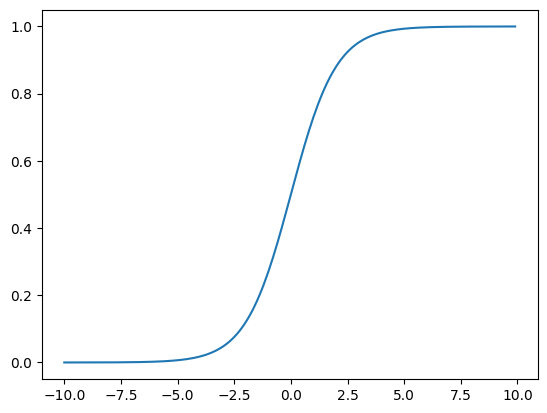

In [42]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
plt.plot(x, y)

Let's use Linear Algebra to do the prediction `y = X @ c`.

In [43]:
# Predict the probability of True
sigmoid(X @ c)

array([[0.0594372 ],
       [0.02027497],
       [0.08536759],
       [0.92943003],
       [0.06654275],
       [0.14772055],
       [0.64277335],
       [0.25852393],
       [0.58548069],
       [0.34907247]])

In [44]:
# comparing with model predictions
test["setosa_prob"]

82     0.059437
134    0.020275
114    0.085368
42     0.929430
109    0.066543
57     0.147721
1      0.642773
70     0.258524
25     0.585481
84     0.349072
Name: setosa_prob, dtype: float64

### Model 4: Predict variety of flower

- classification problem, specifically multi-class classification for `variety`

In [45]:
# PREDICT: which of the 3 varieties is a particular Iris?
xcols = ["sepal length (cm)", "sepal width (cm)", "const"]
ycol = "variety"

# 1. initialize model
mult_model = LogisticRegression(fit_intercept=False)
# 2. fit using train data
mult_model.fit(train[xcols], train[ycol])
# 3. predict for test data and add predictions as a column
test["variety_predictions"] = mult_model.predict(test[xcols])
test

sepal length (cm)  sepal width (cm)  const  petal width (cm)  setosa  \
82                 5.8               2.7      1               1.2   False   
134                6.1               2.6      1               1.4   False   
114                5.8               2.8      1               2.4   False   
42                 4.4               3.2      1               0.2    True   
109                7.2               3.6      1               2.5   False   
57                 4.9               2.4      1               1.0   False   
1                  4.9               3.0      1               0.2    True   
70                 5.9               3.2      1               1.8   False   
25                 5.0               3.0      1               0.2    True   
84                 5.4               3.0      1               1.5   False   

        variety  pet_width_predictions  setosa_predictions  setosa_prob  \
82   versicolor               1.327769               False     0.059437   
134   virginica               1.590835               False     0.020275   
114   virginica               1.279061               False     0.085368   
42       setosa               0.083889                True     0.929430   
109   virginica               1.889735               False     0.066543   
57   versicolor               0.830818               False     0.147721   
1        setosa               0.538569                True     0.642773   
70   versicolor               1.155681               False     0.258524   
25       setosa               0.610022                True     0.585481   
84   versicolor               0.895833               False     0.349072   

    variety_predictions  
82           versicolor  
134           virginica  
114          versicolor  
42               setosa  
109           virginica  
57           versicolor  
1                setosa  
70           versicolor  
25               setosa  
84           versicolor

What is the accuracy?

In [46]:
mult_model.score(test[xcols], test[ycol])

0.9

##### Math behind model 3: how does it predict?

In [47]:
mult_model.coef_

array([[-1.80097204,  3.01989635,  0.69404974],
       [ 0.64875706, -1.46308696,  1.04354373],
       [ 1.15221498, -1.55680939, -1.73759347]])

In [48]:
# taking transpose and assigning values to c
c = mult_model.coef_.T
c

array([[-1.80097204,  0.64875706,  1.15221498],
       [ 3.01989635, -1.46308696, -1.55680939],
       [ 0.69404974,  1.04354373, -1.73759347]])

Each column contains coefficients for scoring a different `variety`.

In [49]:
c.shape # 3 varities

(3, 3)

How can we determine name of each `variety`? 

#### `<model object>.classes_`

- ndarray containing label for each class.
- documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [50]:
mult_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [51]:
# assign X
X = test[xcols].values
X

array([[5.8, 2.7, 1. ],
       [6.1, 2.6, 1. ],
       [5.8, 2.8, 1. ],
       [4.4, 3.2, 1. ],
       [7.2, 3.6, 1. ],
       [4.9, 2.4, 1. ],
       [4.9, 3. , 1. ],
       [5.9, 3.2, 1. ],
       [5. , 3. , 1. ],
       [5.4, 3. , 1. ]])

Extracting "setosa" co-efficients.

In [52]:
# we need a 2-D array
setosa_c = mult_model.coef_.T[:, [0]]
setosa_c

array([[-1.80097204],
       [ 3.01989635],
       [ 0.69404974]])

Let's use Linear Algebra to do the prediction just for "setosa" `y = X @ c`.

In [53]:
X @ setosa_c

array([[-1.59786793],
       [-2.44014918],
       [-1.2958783 ],
       [ 2.43344109],
       [-1.40132207],
       [-0.88296201],
       [ 0.9289758 ],
       [-0.26801696],
       [ 0.7488786 ],
       [ 0.02848978]])

Repeating for other varities.

In [54]:
# versicolor scores
versicolor_c = mult_model.coef_.T[:, [1]] 
X @ versicolor_c

array([[ 0.85599987],
       [ 1.19693568],
       [ 0.70969118],
       [-0.78380349],
       [ 0.44748149],
       [ 0.71104461],
       [-0.16680757],
       [ 0.1893321 ],
       [-0.10193186],
       [ 0.15757096]])

In [55]:
# virginica scores
virginica_c = mult_model.coef_.T[:, [2]] 
X @ virginica_c

array([[ 0.74186806],
       [ 1.24321349],
       [ 0.58618712],
       [-1.6496376 ],
       [ 0.95384058],
       [ 0.1719174 ],
       [-0.76216824],
       [ 0.07868487],
       [-0.64694674],
       [-0.18606075]])

#### Review: how does `MATRIX @ vertical vector` work?

- MATRIX (data) @ vertical vector (coef) gets computed using the below LOOP:
    - For each DATA ROW of MATRIX
        - ROW (horizontal) @ c (vertical)

#### How does `MATRIX 1 @ MATRIX 2` work?

- MATRIX 1 (data) @ MATRIX 2 (coef) gets computed using the below NESTED LOOP:
    - For each DATA ROW of MATRIX 1
        - For each COEFFICIENT COLUMN of MATRIX 2
            - compute the vector @ vector (dot product)
            
Computing all predictions.            

In [56]:
# all varities
c = mult_model.coef_.T
X @ c
# Largest score determines the classification prediction output

array([[-1.59786793,  0.85599987,  0.74186806],
       [-2.44014918,  1.19693568,  1.24321349],
       [-1.2958783 ,  0.70969118,  0.58618712],
       [ 2.43344109, -0.78380349, -1.6496376 ],
       [-1.40132207,  0.44748149,  0.95384058],
       [-0.88296201,  0.71104461,  0.1719174 ],
       [ 0.9289758 , -0.16680757, -0.76216824],
       [-0.26801696,  0.1893321 ,  0.07868487],
       [ 0.7488786 , -0.10193186, -0.64694674],
       [ 0.02848978,  0.15757096, -0.18606075]])

In [57]:
test["variety_predictions"]

82     versicolor
134     virginica
114    versicolor
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
Name: variety_predictions, dtype: object

### `max`, `argmax` methods on `np.array` 

- `max`: returns max value
- `argmax`: returns index of the max value
- same idea for min, argmin

In [58]:
a = np.array([1, 2, 9, 8, 7])
a.max()

9

In [59]:
a.argmax()

2

Let's convert `X @ c` to actual label predictions.

In [60]:
# gives the index of tha max value
(X @ c).argmax()

9

In [61]:
# we want max of each row
(X @ c).argmax(axis=1)

array([1, 2, 1, 0, 2, 1, 0, 1, 0, 1])

In [62]:
mult_model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

`<model obj>.classes_` can return labels given a list of indices.

In [63]:
mult_model.classes_[[0, 1, 2, 0, 1, 2]]

array(['setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica'], dtype=object)

Putting `argmax` and `classes_` together.

In [64]:
mult_model.classes_[(X @ c).argmax(axis=1)]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

In [65]:
pd.Series(mult_model.classes_[(X @ c).argmax(axis=1)])

0    versicolor
1     virginica
2    versicolor
3        setosa
4     virginica
5    versicolor
6        setosa
7    versicolor
8        setosa
9    versicolor
dtype: object

In [66]:
test["variety_predictions"]

82     versicolor
134     virginica
114    versicolor
42         setosa
109     virginica
57     versicolor
1          setosa
70     versicolor
25         setosa
84     versicolor
Name: variety_predictions, dtype: object